This notebook contains my practice notes and results of fast.ai's chaptar 2 of linear algebra: http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/2.%20Topic%20Modeling%20with%20NMF%20and%20SVD.ipynb

In [1]:
!pip install numpy
!pip install sklearn
!pip install scipy
!pip install matplotlib

    100% |████████████████████████████████| 12.2MB 64kB/s eta 0:00:01
You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 4.9MB 154kB/s ta 0:00:011
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 31.2MB 25kB/s eta 0:00:011
You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
    100% |████████████████████████████████| 12.6MB 62kB/s eta 0:00:01
    100% |████████████████████████████████| 512kB 754kB/s ta 0:00:01
    100% |██████████████████

### setting up

In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plot

%matplotlib inline 
np.set_printoptions(suppress=True)

### set train and test data

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

### Get some glimps of data

In [4]:
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

### extract word frequency matrix (bag of words)

In [5]:
# using sklearn to extract frequency matrix
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
# specify the stopwords rule to be used when creating an instance of CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
# see newsgroups train data
print(newsgroups_train.data[0], len(newsgroups_train.data))
# create documents X words Matrix (bag of words Matrix)
vectors = vectorizer.fit_transform(newsgroups_train.data)
print(vectors) # its numpy compressed sparse metrix into a single row
# convert the sparse matrix to dense matrix
vectors = vectors.todense()
print(vectors, vectors.shape)

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych 2034
  (0, 21025)	1
  (0, 3998)	1
  (0, 5546)	1
  (0, 10605)	2
  (0, 20973)	1
  (0, 19841)	1
  (0, 2408)	1
  (0, 14706)	1
  (0, 20977)	1
  (0, 23828)	2
  (0, 21208)	1
  (0, 15301)	1
  (0, 21084)	1
  (0, 9848)	1
  (0, 22878)	1
  (0, 13023)	2
  (0, 14154)	1
  (0, 8554)	2
  (0, 18949)	1
  (0, 18704)	1
  (0, 19066)	3
  (0, 17464)	2
  (0, 18699)	1
  (0, 7698)	1
  (0, 11203)	1
  :	:
  (2032, 58

In [7]:
# get vocabulary dictionary
vocab = np.array(vectorizer.get_feature_names())
print(vocab, '\n', vocab.shape, '\n', vocab[7000:7020])

['00' '000' '0000' ... 'zware' 'zwarte' 'zyxel'] 
 (26576,) 
 ['cosmonauts' 'cosmos' 'cosponsored' 'cost' 'costa' 'costar' 'costing'
 'costly' 'costruction' 'costs' 'cosy' 'cote' 'couched' 'couldn' 'council'
 'councils' 'counsel' 'counselees' 'counselor' 'count']


### Singular Value Decomposition (SVD)

**Idea:** In this document classification problem, we assume each document is can be classified into any of the categories provided purely based on the words used in it. Each distinguishing word in a document from another contributes to the determination of class label to which it belongs.

In Linear Algebra perspective, the features of each topic to be orthonormal. SVD helps us to factorize a single matrix into three matrices - one matrix with orthogonal columns, one with orthogonal rows and another diagonal matrix with relative importance of each factor.

**Notes from fast.ai notebook:** 
- SVD is an **exact decomposition** => the matrices it creates are big enough to fully cover the original martix.
- SVD applications: semantic analysis, collaborative filtering/recommendations, calculate Moore-Penrose pseudoinverse, data compression, principal component analysis.

In [ ]:
# apply SVD to our 'vectors' (Document-Term matrix).
%time U, s, Vh = linalg.svd(vectors) # SVD: A = U.S.Vh

In [8]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False) # SVD: A = U.S.Vh

CPU times: user 1min 53s, sys: 13.4 s, total: 2min 7s
Wall time: 33.8 s


- consider our Document-Term matrix is of size M X N. Then,
- `full_matrices=True` by default gives U of size M X M and Vh of size N X N.
- `full_matrices=False` gives U of size M X min(M,N) and Vh of size min(M,N) X N

In [9]:
# Let's verify,
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


Let's **confirm this is a decomposition of the input.**

In [10]:
US = np.dot(U, np.diag(s))
USVh = np.dot(US, Vh)
print(USVh.shape, vectors.shape) # see if the shapes match
print(np.linalg.norm(vectors - USVh)) # see if the difference between matrices is negligible
print(np.allclose(vectors, USVh)) # see if the matrices are close

(2034, 26576) (2034, 26576)
2.9690515388840644e-12
True


Let's **Confirm that U, V are orthonormal**

In [11]:
# If a matrix A is orthonormal, then A.(Atranspose) is Identity matrix
UUt = np.dot(U, np.transpose(U))
print(UUt)
VhVht = np.dot(Vh, np.transpose(Vh))
print(VhVht)
print(np.allclose(UUt, np.eye(UUt.shape[0])), np.allclose(VhVht, np.eye(VhVht.shape[0])))

[[ 1. -0.  0. ...  0.  0.  0.]
 [-0.  1.  0. ...  0. -0.  0.]
 [ 0.  0.  1. ...  0. -0.  0.]
 ...
 [ 0.  0.  0. ...  1. -0.  0.]
 [ 0. -0. -0. ... -0.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  1.]]
[[ 1.  0. -0. ... -0.  0.  0.]
 [ 0.  1. -0. ... -0. -0.  0.]
 [-0. -0.  1. ...  0.  0. -0.]
 ...
 [-0. -0.  0. ...  1. -0. -0.]
 [ 0. -0.  0. ... -0.  1. -0.]
 [ 0.  0. -0. ... -0. -0.  1.]]
True True


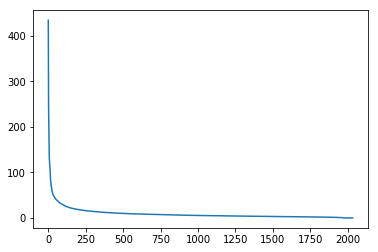

In [12]:
# plot the values of 's' to see how the importance values are distributed
plot.plot(s)

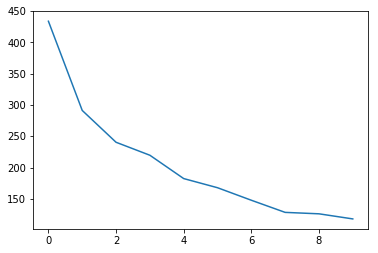

In [13]:
# what about first 10 values
plot.plot(s[:10])

**what's that we're seeing?** The above plots of vector `s` (vector of eigen values) shows that, the importance of vectors in `U` and `Vh` (eigen vectors) is decreasing exponentially as we move to the right (`U`) or down (`Vh`) respectively. In plot 2, we can see the most effective part lies within the first 10 columns (`U`) or rows (`Vh`) respectively.

In [14]:
print(Vh.shape, Vh[:10].shape)

# this is a rewritten (fast.ai notebook's having a different version) code for better understandability.
for t in Vh[:10]:
    sorted8 = np.argsort(t)[:-8:-1]
    topic_words = []
    for i in sorted8:
        topic_words.append(vocab[i])
    print(topic_words)

(2034, 26576) (10, 26576)
['ditto', 'critus', 'propagandist', 'surname', 'galacticentric', 'kindergarten', 'surreal']
['jpeg', 'gif', 'file', 'color', 'quality', 'image', 'jfif']
['graphics', 'edu', 'pub', 'mail', '128', '3d', 'ray']
['jesus', 'god', 'matthew', 'people', 'atheists', 'atheism', 'does']
['image', 'data', 'processing', 'analysis', 'software', 'available', 'tools']
['god', 'atheists', 'atheism', 'religious', 'believe', 'religion', 'argument']
['space', 'nasa', 'lunar', 'mars', 'probe', 'moon', 'missions']
['image', 'probe', 'surface', 'lunar', 'mars', 'probes', 'moon']
['argument', 'fallacy', 'conclusion', 'example', 'true', 'ad', 'argumentum']
['space', 'larson', 'image', 'theory', 'universe', 'physical', 'nasa']


**what we're seeing here?** The above code is loading the first 10 row vectors in `Vh`, and each vector is sorted within based on their actual value. Why we're doing this? I don't know! But when we look at the corresponding words it represents, wow! we got a nice cluster of words which denotes each topic that we're interested in.

#### So the takeaway is, SVD can be used as an Unsupervised Clustering tool. 

### Non-negative Matrix Factorization (NMF)

**my notes:**
        Before going into NMF, I have explored what `Eigenfaces / Eigenimages` are and easily found this useful [wikipedia section](https://en.wikipedia.org/wiki/Eigenface#Practical_implementation). These are some quick points from there:

* Eigenfaces is the name given to a set of eigenvectors when they are used in the computer vision problem of human face recognition.
* The eigenvectors are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of face images.
* The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. This produces dimension reduction by allowing the smaller set of basis images to represent the original training images.
* This technique is also used for Handwriting recognition, lip reading, voice recognition, sign language/hand gestures interpretation and medical imaging analysis.

**steps to create Eigenfaces:**
* Prepare a training set of face images. Each image is treated as one vector, simply by concatenating the rows of pixels in the original image, resulting in a single column with r × c elements (**T**).
* Subtract the mean. The average image a has to be calculated and then subtracted from each original image in **T**.
* Calculate the eigenvectors and eigenvalues of the covariance matrix S. Each eigenvector has the same dimensionality (number of components) as the original images, and thus can itself be seen as an image. **They are the directions in which the images differ from the mean image**. 
* Reduce dimention: choose the useful principal components. Sort the eigenvalues in descending order and arrange eigenvectors accordingly. Then select first **k** dimensions, to meet a threshold **ε** on the total variance. ![choosing k](https://wikimedia.org/api/rest_v1/media/math/render/svg/036427209d688792cdfdd5b7de5bf971074a8060)
* we can project a new (mean-subtracted) image on the eigenfaces and thereby record how that new face differs from the mean face.

### NMF

In SVD matrix factorisation, we constrained our factors to be orthogonal. NMF is also anther matrix factorisation technique, where we constrain the factors to be non negative. NMF of a non negative matrix (dataset) **V** = **W**.**H**

* why non negative constrain? Because, positive values are easy to interpret.
* NMF is a non-exact factorization.
* NMF is NP-hard and non-unique.
* Applications: Face Decompositions, Collaborative Filtering, eg movie recommendations, Audio source separation, Chemistry, Bioinformatics and Gene Expression, Topic Modeling (our problem!)

![NMF Eigenfaces](https://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/images/face_nmf.png)
![NMF topic modelling](https://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/images/nmf_doc.png)

### NMF from sklearn

In [15]:
m, n = vectors.shape
d = 5

In [19]:
clsf = decomposition.NMF(n_components=d, random_state=1)

W1 = clsf.fit_transform(vectors)
H1 = clsf.components_

In [22]:
def show_topics(IN):
    for t in IN[:10]:
        sorted8 = np.argsort(t)[:-8:-1]
        topic_words = []
        for i in sorted8:
            topic_words.append(vocab[i])
        print(topic_words)

In [23]:
show_topics(H1)

['jpeg', 'image', 'gif', 'file', 'color', 'images', 'format']
['edu', 'graphics', 'pub', 'mail', '128', 'ray', 'ftp']
['space', 'launch', 'satellite', 'nasa', 'commercial', 'satellites', 'year']
['jesus', 'god', 'people', 'matthew', 'atheists', 'does', 'atheism']
['image', 'data', 'available', 'software', 'processing', 'ftp', 'edu']


**my notes - What am I seeing?**

Similar: After trying out SVD and NMF for Matrix factorisation, we're seeing similar word clustering in NMF as SVD did. 

Different: The factorization speed of NMF is very high when compaired to SVD.

### TF-IDF

**Term Frequency-Inverse Document Frequency** 

Till now, we've used created a term frequency matrix from documents without taking into account the `relavance` that term have in that document. TF-IDF is a method to normalize the term frequency count based on its relevance within the document as well as in the entire dataset of documents. 

Its composed of two parts:

TF = (# occurrences of term t in document) / (# of words in documents)

IDF = log(# of documents / # documents with term t in it)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab)

In [27]:
W1 = clsf.fit_transform(vectors_tfidf)
H1 = clsf.components_

In [28]:
show_topics(H1)

['people', 'don', 'think', 'just', 'like', 'objective', 'say']
['graphics', 'thanks', 'files', 'image', 'file', 'program', 'windows']
['space', 'nasa', 'launch', 'shuttle', 'orbit', 'moon', 'lunar']
['ico', 'bobbe', 'tek', 'beauchaine', 'bronx', 'manhattan', 'sank']
['god', 'jesus', 'bible', 'believe', 'christian', 'atheism', 'does']


**my notes:**

Personally, to me, first line doesn't make any sense. May be they are some unique words that doesn't belong to a specific topic. 

My observations:
* similarity: the results are very similar (and more clean) to SVD and NMF (without TF-IDF).
* difference: it was faster than NMF without TF-IDF. Reason is, the original term frequency matrix got rid of words those are non relevant (stop_words).

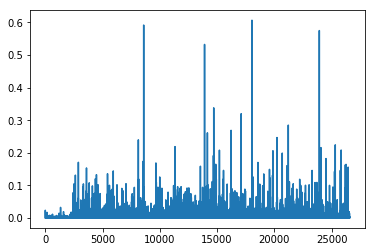

In [45]:
plot.plot(clsf.components_[0])

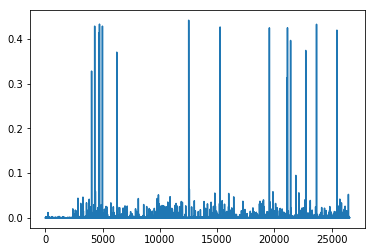

In [47]:
plot.plot(clsf.components_[3])

**my notes:** Above plots represents the importance of words in each row of **H** for each topic. After plotting a couple of graphs (above ones represents selected two from I found), what we can see is, the first row in **H** is contributing to all documents almost equally well. That's we we're seeing a cluster of some general but unique words in the first row. But in the second graph we see the contributions are very specific.

In [49]:
clsf.reconstruction_err_

43.71292605795281

### NMF in summary

Benefits: Fast and easy to use!

Downsides: took years of research and expertise to create - which means, it takes a lot of time to build from scratch.


Notes:
* For NMF, matrix needs to be at least as tall as it is wide, or we get an error with fit_transform
* Can use df_min in CountVectorizer to only look at words that were in at least k of the split texts